Link para o dataset: </br>
https://www.tensorflow.org/datasets/catalog/fashion_mnist?hl=pt-br </br>
https://github.com/zalandoresearch/fashion-mnist

In [ ]:
# Importar as bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report



In [ ]:

# Carregar o conjunto de dados Fashion MNIST
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Dividir o conjunto de treino em treino e validação
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.1, random_state=42)


4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
# Verificar o formato dos dados
print(f"Formato dos dados de treino: {train_images.shape}")
print(f"Número de exemplos de treino: {len(train_labels)}")

# Verificar o formato dos dados de teste
print(f"\nFormato dos dados de teste: {test_images.shape}")
print(f"Número de exemplos de teste: {len(test_labels)}")

# Verificar o formato dos dados de validação
print(f"\nFormato dos dados de validação: {val_images.shape}")
print(f"Número de exemplos de validação: {len(val_labels)}")

Formato dos dados de treino: (54000, 28, 28)
Número de exemplos de treino: 54000

Formato dos dados de teste: (10000, 28, 28)
Número de exemplos de teste: 10000

Formato dos dados de validação: (6000, 28, 28)
Número de exemplos de validação: 6000


https://github.com/zalandoresearch/fashion-mnist#labels

| Label | Descrição |
|---|:---|
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |


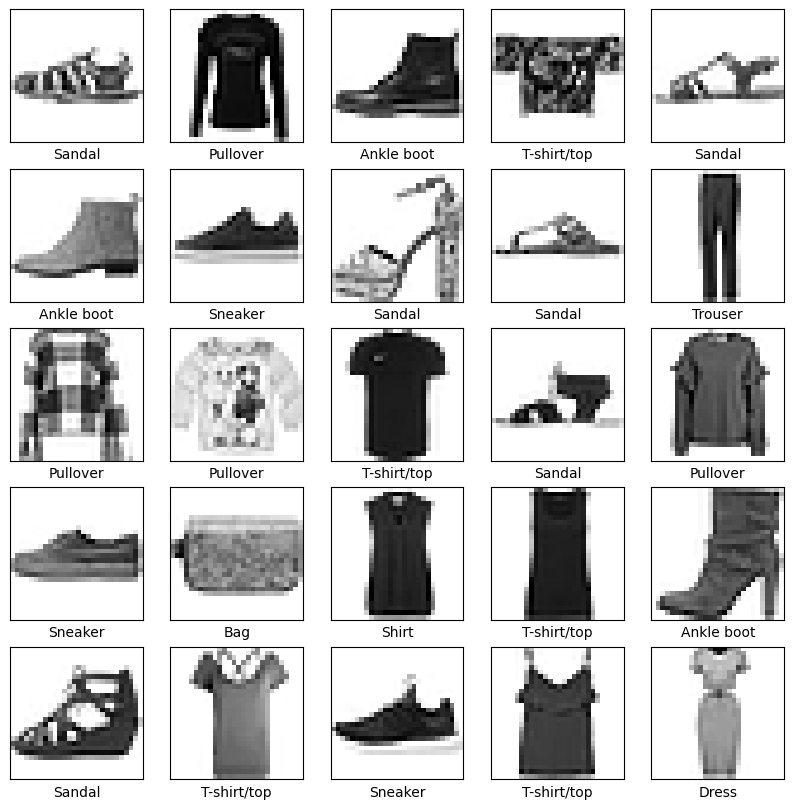

In [ ]:

# Definir os nomes das classes
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Mostrar algumas imagens do conjunto de dados
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


Valor mínimo de pixel nos dados de treino: 0
Valor máximo de pixel nos dados de treino: 255
Número de classes: 10


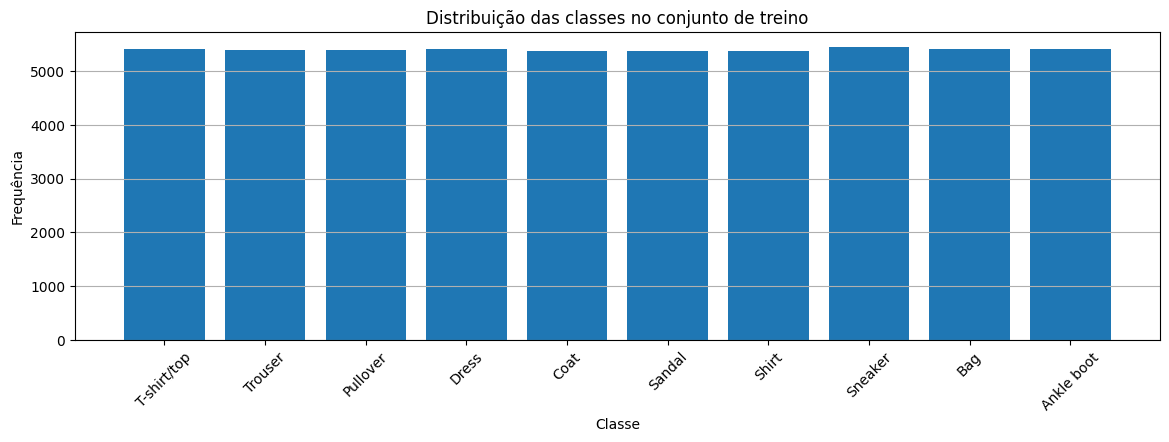

In [ ]:
# Estatísticas descritivas dos dados de treino
print(f"Valor mínimo de pixel nos dados de treino: {np.min(train_images)}")
print(f"Valor máximo de pixel nos dados de treino: {np.max(train_images)}")
print(f"Número de classes: {len(np.unique(train_labels))}")

plt.figure(figsize=(14, 4))

# Criando os bins com um pequeno espaço entre eles
bins = np.arange(len(class_names) + 1) - 0.5

plt.hist(train_labels, bins=bins, rwidth=0.8)
plt.xticks(range(len(class_names)), class_names, rotation=45)
plt.xlabel('Classe')
plt.ylabel('Frequência')
plt.title('Distribuição das classes no conjunto de treino')
plt.grid(axis='y')  # Adiciona linhas de grade no eixo y para melhor visualização
plt.show()




In [ ]:
# Pré-processamento dos dados
# Normalizar os valores dos pixels para o intervalo [0, 1]
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Adicionar uma dimensão para os canais de cor (escala de cinza)
train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)


# Construir o modelo CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')  # 10 classes de saída
])

# Compilar o modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Treinar o modelo
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(test_images, test_labels))

Epoch 1/5
844/844 [==============================] - 54s 58ms/step - loss: 0.5487 - accuracy: 0.8007 - val_loss: 0.3796 - val_accuracy: 0.8647
Epoch 2/5
844/844 [==============================] - 42s 50ms/step - loss: 0.3426 - accuracy: 0.8766 - val_loss: 0.3290 - val_accuracy: 0.8782
Epoch 3/5
844/844 [==============================] - 43s 50ms/step - loss: 0.2968 - accuracy: 0.8912 - val_loss: 0.3284 - val_accuracy: 0.8789
Epoch 4/5
844/844 [==============================] - 44s 52ms/step - loss: 0.2667 - accuracy: 0.9016 - val_loss: 0.2956 - val_accuracy: 0.8905
Epoch 5/5
844/844 [==============================] - 42s 50ms/step - loss: 0.2439 - accuracy: 0.9103 - val_loss: 0.2882 - val_accuracy: 0.8951


In [ ]:
# Avaliar o modelo
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Acurácia no conjunto de teste: {test_accuracy}')

# Avaliar o modelo nos dados de validação
val_loss, val_accuracy = model.evaluate(val_images, val_labels)
print(f'Acurácia no conjunto de validação: {val_accuracy}')

# Previsões nos dados de validação
val_predictions = model.predict(val_images)
val_predictions_labels = np.argmax(val_predictions, axis=1)

# Métricas detalhadas
print(f'F1 Score: {f1_score(val_labels, val_predictions_labels, average="weighted")}')
print(classification_report(val_labels, val_predictions_labels, target_names=class_names))

313/313 [==============================] - 4s 12ms/step - loss: 0.2882 - accuracy: 0.8951
Acurácia no conjunto de teste: 0.8950999975204468
188/188 [==============================] - 2s 7ms/step - loss: 38.8734 - accuracy: 0.8552
Acurácia no conjunto de validação: 0.8551666736602783
188/188 [==============================] - 1s 7ms/step
F1 Score: 0.8551636330907092
              precision    recall  f1-score   support

 T-shirt/top       0.93      0.65      0.77       597
     Trouser       0.99      0.97      0.98       608
    Pullover       0.79      0.76      0.77       611
       Dress       0.93      0.81      0.87       587
        Coat       0.66      0.94      0.77       627
      Sandal       0.94      0.97      0.95       621
       Shirt       0.66      0.63      0.64       619
     Sneaker       0.93      0.93      0.93       550
         Bag       0.90      0.98      0.94       590
  Ankle boot       0.97      0.91      0.94       590

    accuracy                        

313/313 [==============================] - 3s 10ms/step - loss: 0.2882 - accuracy: 0.8951
Acurácia no conjunto de teste: 0.8950999975204468
313/313 [==============================] - 4s 12ms/step


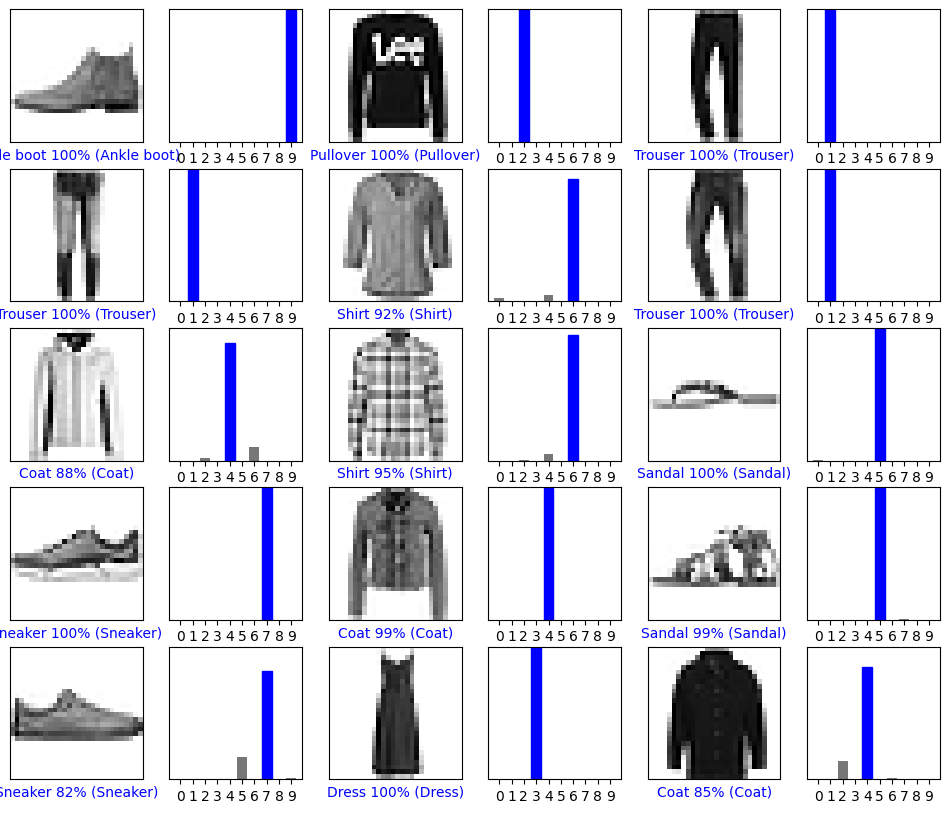

In [ ]:
# Avaliar o modelo
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Acurácia no conjunto de teste: {test_accuracy}')

# Fazer previsões para algumas imagens de teste
predictions = model.predict(test_images)

# Função para mostrar a imagem e a previsão
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                          100 * np.max(predictions_array),
                                          class_names[true_label]),
               color=color)

# Função para mostrar o valor previsto em um gráfico de barras
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

# Ver algumas previsões
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions, test_labels)
plt.show()
